In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.drop('Name',axis=1,inplace=True)

In [6]:
pd.get_dummies(df['HomePlanet'])

,Earth,Europa,Mars
0,False,True,False
1,True,False,False
2,False,True,False
3,False,True,False
4,True,False,False
...,...,...,...
8688,False,True,False
8689,True,False,False
8690,True,False,False
8691,False,True,False


In [7]:
pd.get_dummies(df['Destination'])

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
8688,True,False,False
8689,False,True,False
8690,False,False,True
8691,True,False,False


In [8]:
mean_value = df['Age'].mean()

In [9]:
mean_value

28.82793046746535

In [10]:
def impute_age(cols):
    Age = cols[0]
    VIP = cols[1]
    
    if pd.isnull(Age):
        if VIP == 'True':
            return 35
        else :
            return 27
        
    else:
        return Age

In [11]:
df['Age']= df[['Age','VIP']].apply(impute_age,axis=1)

/var/folders/08/3tryyytd3ml61cll5x4j13jr0000gn/T/ipykernel_5697/1040225551.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/08/3tryyytd3ml61cll5x4j13jr0000gn/T/ipykernel_5697/1040225551.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  VIP = cols[1]


<Axes: >

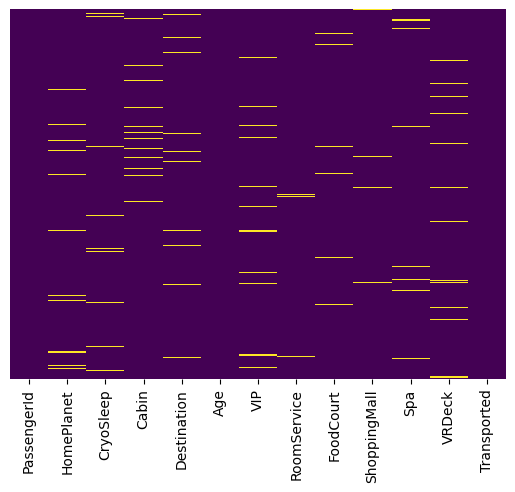

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
vip=pd.get_dummies(df['VIP'])

In [14]:
from sklearn.impute import KNNImputer

In [15]:
knn = KNNImputer(n_neighbors=4)

In [16]:
knn.fit(vip)

KNNImputer(n_neighbors=4)

In [17]:
sewy=knn.transform(vip)

In [18]:
sewy

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [19]:
vip = pd.DataFrame(sewy)

In [20]:

g = pd.concat([vip, df], axis=1)

In [21]:
g

,0,1,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1.0,0.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,0.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,1.0,0.0,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [22]:
g.drop('VIP',axis=1,inplace=True)

In [23]:
g

,0,1,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,1.0,0.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,0.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,1.0,0.0,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [24]:
df1 = g.rename(columns={'1': 'vipdrop'})

In [25]:
df1

,0,1,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,1.0,0.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,0.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,1.0,0.0,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,False


<Axes: >

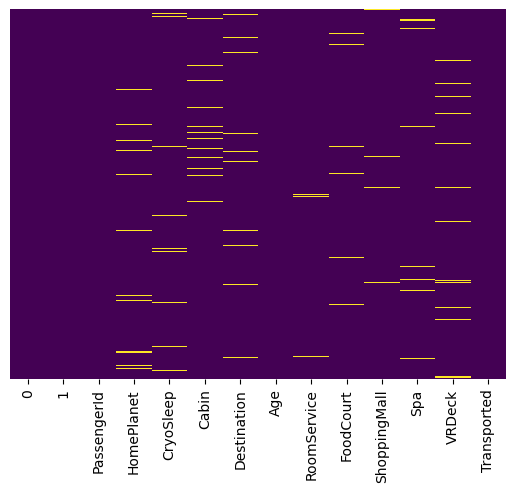

In [26]:
sns.heatmap(g.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
g

,0,1,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0.0,1.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,1.0,0.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,0.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,1.0,0.0,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [28]:
pd.get_dummies

<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'>

In [29]:
g.drop('CryoSleep',inplace=True,axis=1)

In [30]:
g.drop('Cabin',inplace=True,axis=1)

In [31]:
g.drop('RoomService',inplace=True,axis=1)

In [32]:
g.drop('FoodCourt',inplace=True,axis=1)

In [33]:
g.drop('ShoppingMall',inplace=True,axis=1)

In [34]:
g.drop('Spa',inplace=True,axis=1)

In [35]:
g.drop('VRDeck',inplace=True,axis=1)

In [36]:
g

,0,1,PassengerId,HomePlanet,Destination,Age,Transported
0,1.0,0.0,0001_01,Europa,TRAPPIST-1e,39.0,False
1,1.0,0.0,0002_01,Earth,TRAPPIST-1e,24.0,True
2,0.0,1.0,0003_01,Europa,TRAPPIST-1e,58.0,False
3,1.0,0.0,0003_02,Europa,TRAPPIST-1e,33.0,False
4,1.0,0.0,0004_01,Earth,TRAPPIST-1e,16.0,True
...,...,...,...,...,...,...,...
8688,0.0,1.0,9276_01,Europa,55 Cancri e,41.0,False
8689,1.0,0.0,9278_01,Earth,PSO J318.5-22,18.0,False
8690,1.0,0.0,9279_01,Earth,TRAPPIST-1e,26.0,True
8691,1.0,0.0,9280_01,Europa,55 Cancri e,32.0,False


<Axes: >

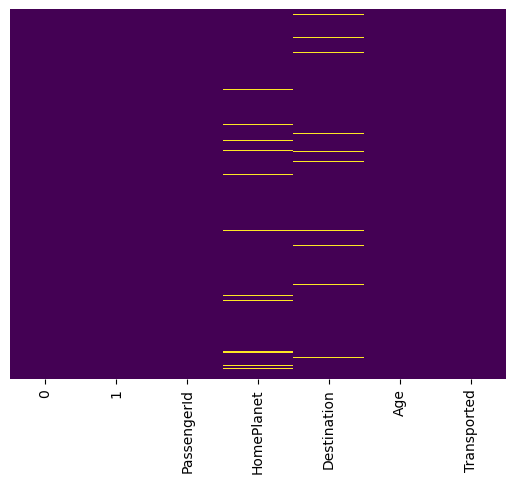

In [37]:
sns.heatmap(g.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
destination=pd.get_dummies(g['Destination'])

In [39]:
destination

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
8688,True,False,False
8689,False,True,False
8690,False,False,True
8691,True,False,False


In [40]:
from sklearn.impute import KNNImputer

In [41]:
knn=KNNImputer(n_neighbors=4)

In [42]:
knn.fit(destination)

KNNImputer(n_neighbors=4)

In [43]:
aa=knn.transform(destination)

In [44]:
aa

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [45]:
ss=pd.concat([destination,g],axis=1)

In [46]:
ss

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,0,1,PassengerId,HomePlanet,Destination,Age,Transported
0,False,False,True,1.0,0.0,0001_01,Europa,TRAPPIST-1e,39.0,False
1,False,False,True,1.0,0.0,0002_01,Earth,TRAPPIST-1e,24.0,True
2,False,False,True,0.0,1.0,0003_01,Europa,TRAPPIST-1e,58.0,False
3,False,False,True,1.0,0.0,0003_02,Europa,TRAPPIST-1e,33.0,False
4,False,False,True,1.0,0.0,0004_01,Earth,TRAPPIST-1e,16.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,True,False,False,0.0,1.0,9276_01,Europa,55 Cancri e,41.0,False
8689,False,True,False,1.0,0.0,9278_01,Earth,PSO J318.5-22,18.0,False
8690,False,False,True,1.0,0.0,9279_01,Earth,TRAPPIST-1e,26.0,True
8691,True,False,False,1.0,0.0,9280_01,Europa,55 Cancri e,32.0,False


<Axes: >

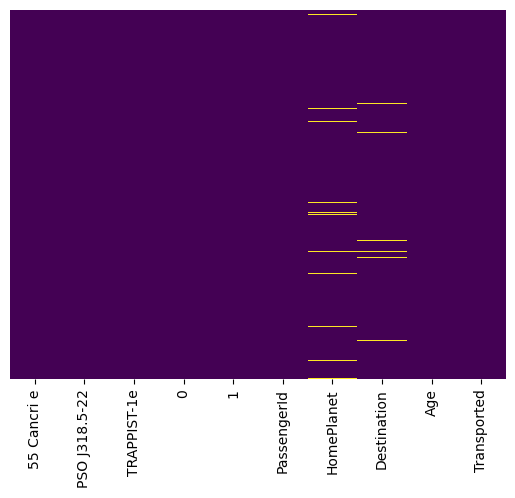

In [47]:
sns.heatmap(ss.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
homeplanet=pd.get_dummies(g['HomePlanet'])

In [49]:
knn=KNNImputer(n_neighbors=4)

In [50]:
knn.fit(homeplanet)

KNNImputer(n_neighbors=4)

In [51]:
sewy2=knn.transform(homeplanet)

In [52]:
abc=pd.concat([homeplanet,ss],axis=1)

In [53]:
abc

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,0,1,PassengerId,HomePlanet,Destination,Age,Transported
0,False,True,False,False,False,True,1.0,0.0,0001_01,Europa,TRAPPIST-1e,39.0,False
1,True,False,False,False,False,True,1.0,0.0,0002_01,Earth,TRAPPIST-1e,24.0,True
2,False,True,False,False,False,True,0.0,1.0,0003_01,Europa,TRAPPIST-1e,58.0,False
3,False,True,False,False,False,True,1.0,0.0,0003_02,Europa,TRAPPIST-1e,33.0,False
4,True,False,False,False,False,True,1.0,0.0,0004_01,Earth,TRAPPIST-1e,16.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,1.0,9276_01,Europa,55 Cancri e,41.0,False
8689,True,False,False,False,True,False,1.0,0.0,9278_01,Earth,PSO J318.5-22,18.0,False
8690,True,False,False,False,False,True,1.0,0.0,9279_01,Earth,TRAPPIST-1e,26.0,True
8691,False,True,False,True,False,False,1.0,0.0,9280_01,Europa,55 Cancri e,32.0,False


<Axes: >

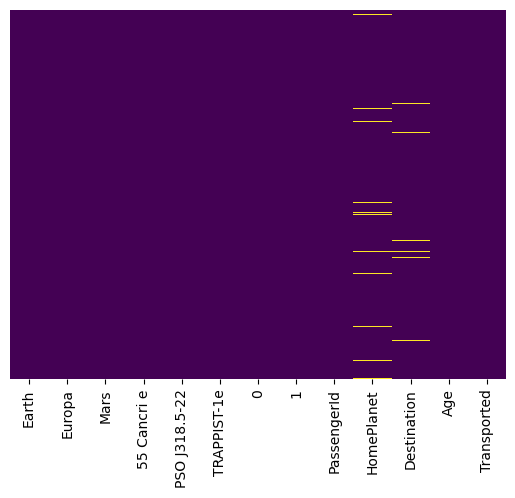

In [54]:
sns.heatmap(abc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
abc.drop('HomePlanet',axis=1,inplace=True)

In [56]:
abc.drop('Destination',axis=1,inplace=True)

In [57]:
abc

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,0,1,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,1.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,1.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,0.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,0.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,0.0,9280_01,32.0,False


<Axes: >

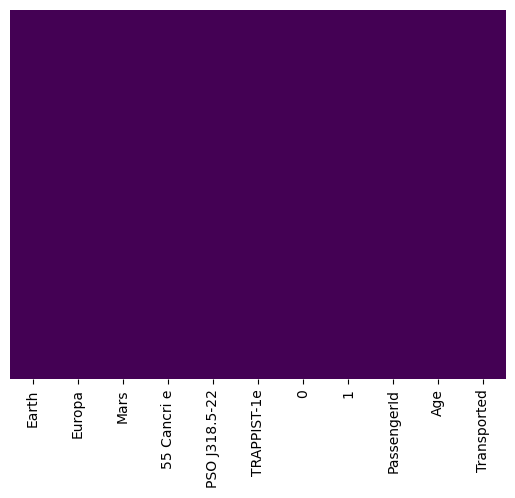

In [58]:
sns.heatmap(abc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
abc.rename(columns={0:'VIP'},inplace=True)

In [60]:
abc.rename(columns={1:'VIPs'},inplace=True)

In [61]:
abc

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,VIP,VIPs,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,1.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,1.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,0.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,0.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,0.0,9280_01,32.0,False


In [62]:
abc.drop('VIPs',axis=1,inplace=True)

In [63]:
abc

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,VIP,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,9280_01,32.0,False


In [64]:
abc.rename(columns={'55 Cancri e': 'NewAge'})

,Earth,Europa,Mars,NewAge,PSO J318.5-22,TRAPPIST-1e,VIP,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,9280_01,32.0,False


In [65]:
abc.columns

Index(['Earth', 'Europa', 'Mars', '55 Cancri e', 'PSO J318.5-22',
       'TRAPPIST-1e', 'VIP', 'PassengerId', 'Age', 'Transported'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=abc.drop('Transported',axis=1)
y=abc['Transported']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lgr=LogisticRegression()

In [70]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [71]:
predict=lgr.predict(X_test)

In [72]:
predict

array([ True,  True,  True, ...,  True,  True,  True])

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1424
        True       0.50      1.00      0.67      1445

    accuracy                           0.50      2869
   macro avg       0.25      0.50      0.33      2869
weighted avg       0.25      0.50      0.34      2869

[[   0 1424]
 [   0 1445]]


/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.svm import SVC

In [77]:
param_grid={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [78]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.503 total time=   0.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.504 total time=   0.5s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.504 total time=   0.5s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.504 total time=   0.5s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.503 total time=   0.5s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.503 total time=   0.4s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time=   0.4s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time=   0.4s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time=   0.4s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.503 total time=   0.4s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.503 total time=   0.4s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [79]:
grid_predictions = grid.predict(X_test)

In [80]:
print(confusion_matrix(y_test,grid_predictions))

[[1208  216]
 [1088  357]]


In [81]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       False       0.53      0.85      0.65      1424
        True       0.62      0.25      0.35      1445

    accuracy                           0.55      2869
   macro avg       0.57      0.55      0.50      2869
weighted avg       0.57      0.55      0.50      2869



In [82]:
testdata=pd.read_csv('test.csv')

In [83]:
testdata

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [84]:
testdata.drop('CryoSleep',axis=1,inplace=True)
testdata.drop('Cabin',axis=1,inplace=True)


In [85]:
testdata.drop('RoomService',axis=1,inplace=True)

In [86]:
testdata.drop('FoodCourt',axis=1,inplace=True)

In [87]:
testdata.drop('ShoppingMall',axis=1,inplace=True)

In [88]:
testdata.drop('Spa',axis=1,inplace=True)

In [89]:
testdata.drop('VRDeck',axis=1,inplace=True)

In [90]:
testdata.drop('Name',axis=1,inplace=True)

In [91]:
testdata

,PassengerId,HomePlanet,Destination,Age,VIP
0,0013_01,Earth,TRAPPIST-1e,27.0,False
1,0018_01,Earth,TRAPPIST-1e,19.0,False
2,0019_01,Europa,55 Cancri e,31.0,False
3,0021_01,Europa,TRAPPIST-1e,38.0,False
4,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...
4272,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,9271_01,Mars,55 Cancri e,NaN,False
4275,9273_01,Europa,NaN,NaN,False


/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='VIP', ylabel='Age'>

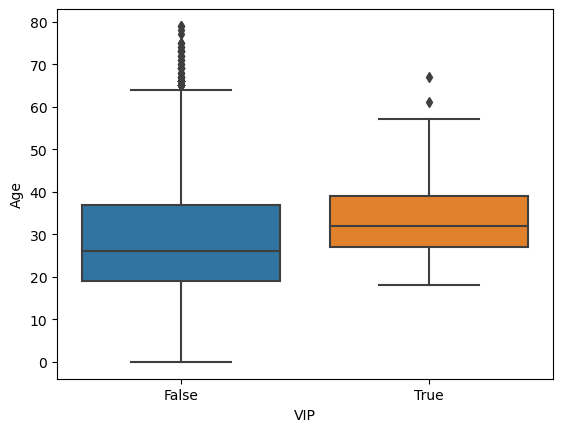

In [92]:
sns.boxplot(data=testdata,x='VIP',y='Age')

In [93]:
def param(cols):
    Age=cols[0]
    VIP=cols[1]
    
    if pd.isnull(Age):
        if VIP=='True':
            return 33
        else:
            return 28
        
    else: 
        return Age
        



In [94]:
testdata['Age']=testdata[['Age','VIP']].apply(param,axis=1)

/var/folders/08/3tryyytd3ml61cll5x4j13jr0000gn/T/ipykernel_5697/3043482017.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/var/folders/08/3tryyytd3ml61cll5x4j13jr0000gn/T/ipykernel_5697/3043482017.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  VIP=cols[1]


<Axes: >

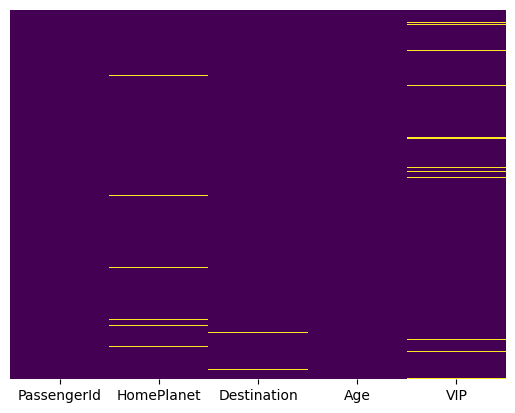

In [95]:
sns.heatmap(testdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
destination=pd.get_dummies(testdata['Destination'])

In [97]:
destination

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
...,...,...,...
4272,False,False,True
4273,False,False,True
4274,True,False,False
4275,False,False,False


In [98]:
new_names={'55 Cancri e':'destinationfirst','PSO J318.5-22':'destinationsecond','TRAPPIST-1e':'destinationthird'}

In [99]:
destination = destination.rename(columns=new_names)

In [100]:
destination

,destinationfirst,destinationsecond,destinationthird
0,False,False,True
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
...,...,...,...
4272,False,False,True
4273,False,False,True
4274,True,False,False
4275,False,False,False


In [101]:
result = pd.concat([destination, testdata], axis=1)

In [102]:
result

,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...
4272,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,False,False,False,9273_01,Europa,NaN,28.0,False


In [103]:
result

,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...
4272,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,False,False,False,9273_01,Europa,NaN,28.0,False


<Axes: >

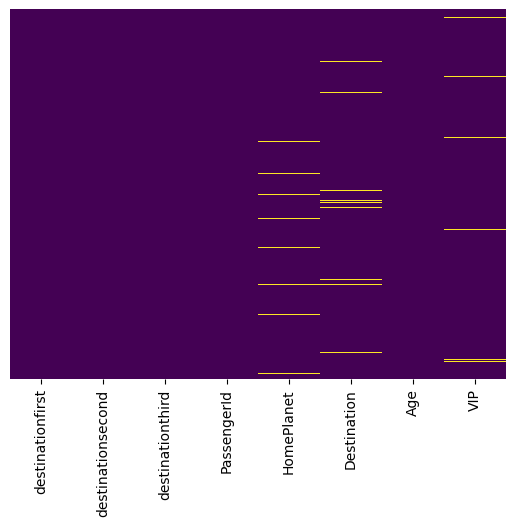

In [104]:
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [105]:
from sklearn.impute import KNNImputer

In [106]:
knn=KNNImputer(n_neighbors=4)

In [107]:
knn.fit(destination)

KNNImputer(n_neighbors=4)

In [108]:
knn.transform(destination)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.]])

In [109]:
new = pd.DataFrame(destination)

In [110]:
pd.concat([new,testdata],axis=1)

,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...
4272,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,False,False,False,9273_01,Europa,NaN,28.0,False


<Axes: >

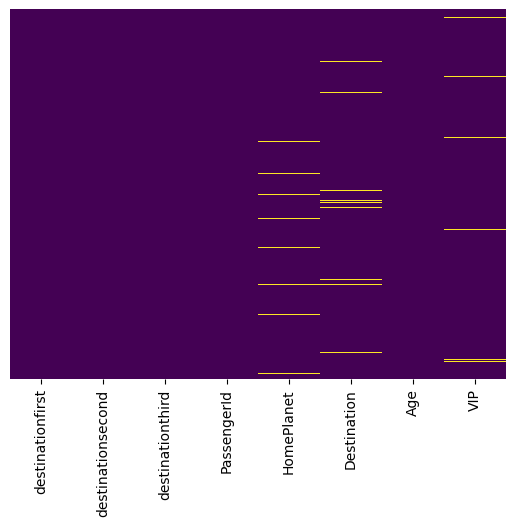

In [111]:
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [112]:
vip=pd.get_dummies(result['VIP'])

In [113]:
vip

,False,True
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
4272,True,False
4273,True,False
4274,True,False
4275,True,False


In [114]:
from sklearn.impute import KNNImputer

In [115]:
knn=KNNImputer(n_neighbors=4)

In [116]:
knn.fit(vip)

KNNImputer(n_neighbors=4)

In [117]:
knn.transform(vip)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [118]:
new=pd.concat([vip,result],axis=1)

In [119]:
new

,False,True,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,True,False,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,True,False,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,True,False,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,True,False,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,True,False,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,True,False,False,False,False,9273_01,Europa,NaN,28.0,False


<Axes: >

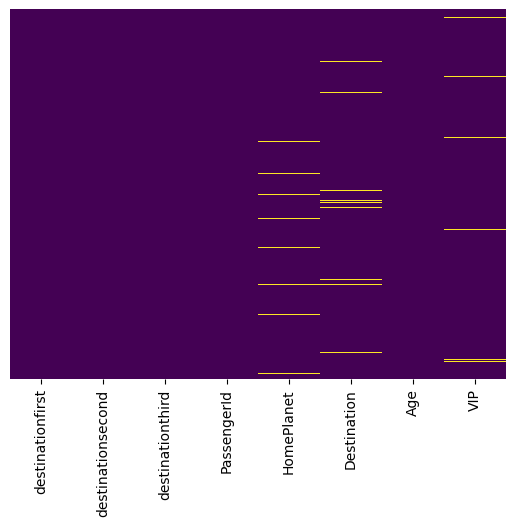

In [120]:
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [121]:
new

,False,True,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,True,False,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,True,False,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,True,False,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,True,False,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,True,False,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,True,False,False,False,False,9273_01,Europa,NaN,28.0,False


In [122]:
result

,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...
4272,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,False,False,False,9273_01,Europa,NaN,28.0,False


<Axes: >

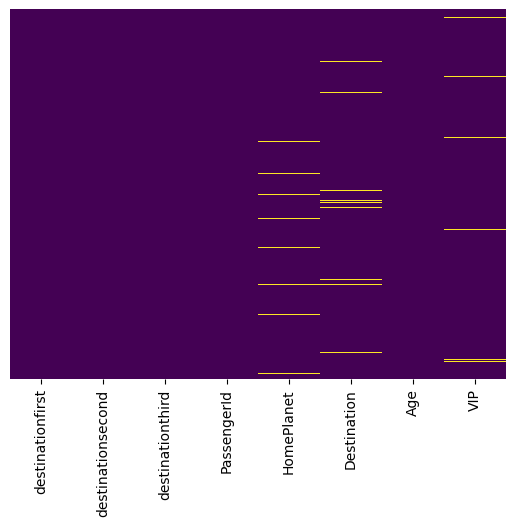

In [123]:
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [124]:
newvip=pd.get_dummies(result['VIP'])

In [125]:
knn.fit(newvip)

KNNImputer(n_neighbors=4)

In [126]:
knn.transform(newvip)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [127]:
newtable=pd.concat([newvip,result],axis=1)

In [128]:
newtable

,False,True,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,True,False,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,True,False,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,True,False,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,True,False,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0,False
4273,True,False,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0,False
4274,True,False,True,False,False,9271_01,Mars,55 Cancri e,28.0,False
4275,True,False,False,False,False,9273_01,Europa,NaN,28.0,False


<Axes: >

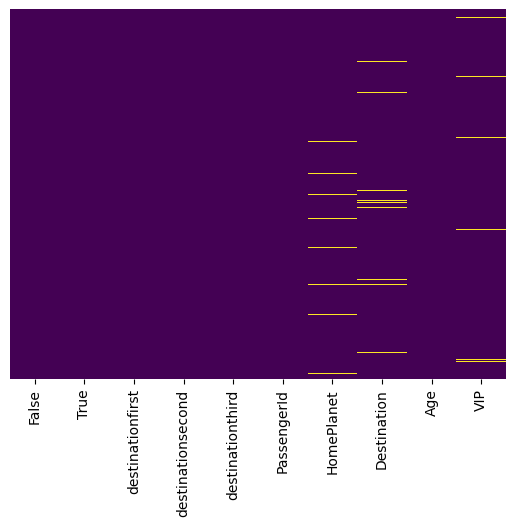

In [129]:
sns.heatmap(newtable.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [130]:
newtable.drop('VIP',axis=1,inplace=True)

In [131]:
homeplanet=pd.get_dummies(newtable['HomePlanet'])

In [132]:
from sklearn.impute import KNNImputer

In [133]:
knn = KNNImputer(n_neighbors=4)

In [134]:
knn.fit(homeplanet)

KNNImputer(n_neighbors=4)

In [135]:
knn.transform(homeplanet)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [136]:
table=pd.concat([homeplanet,newtable],axis=1)

In [137]:
table

,Earth,Europa,Mars,False,True,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age
0,True,False,False,True,False,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0
1,True,False,False,True,False,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0
2,False,True,False,True,False,True,False,False,0019_01,Europa,55 Cancri e,31.0
3,False,True,False,True,False,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0
4,True,False,False,True,False,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,True,False,False,False,True,9266_02,Earth,TRAPPIST-1e,34.0
4273,True,False,False,True,False,False,False,True,9269_01,Earth,TRAPPIST-1e,42.0
4274,False,False,True,True,False,True,False,False,9271_01,Mars,55 Cancri e,28.0
4275,False,True,False,True,False,False,False,False,9273_01,Europa,NaN,28.0


In [138]:
table.drop('HomePlanet',axis=1,inplace=True)

In [139]:
table

,Earth,Europa,Mars,False,True,destinationfirst,destinationsecond,destinationthird,PassengerId,Destination,Age
0,True,False,False,True,False,False,False,True,0013_01,TRAPPIST-1e,27.0
1,True,False,False,True,False,False,False,True,0018_01,TRAPPIST-1e,19.0
2,False,True,False,True,False,True,False,False,0019_01,55 Cancri e,31.0
3,False,True,False,True,False,False,False,True,0021_01,TRAPPIST-1e,38.0
4,True,False,False,True,False,False,False,True,0023_01,TRAPPIST-1e,20.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,True,False,False,False,True,9266_02,TRAPPIST-1e,34.0
4273,True,False,False,True,False,False,False,True,9269_01,TRAPPIST-1e,42.0
4274,False,False,True,True,False,True,False,False,9271_01,55 Cancri e,28.0
4275,False,True,False,True,False,False,False,False,9273_01,NaN,28.0


<Axes: >

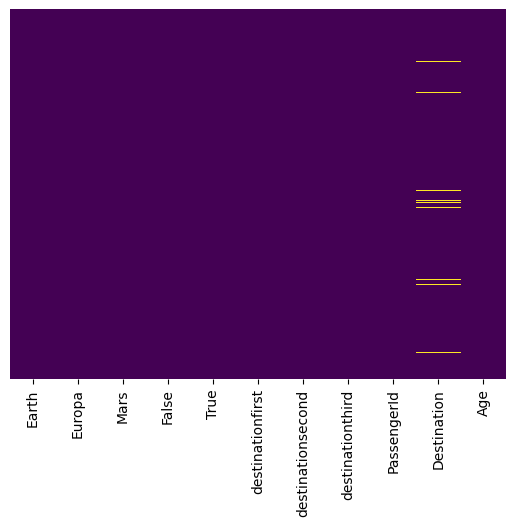

In [140]:
sns.heatmap(table.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [141]:
table

,Earth,Europa,Mars,False,True,destinationfirst,destinationsecond,destinationthird,PassengerId,Destination,Age
0,True,False,False,True,False,False,False,True,0013_01,TRAPPIST-1e,27.0
1,True,False,False,True,False,False,False,True,0018_01,TRAPPIST-1e,19.0
2,False,True,False,True,False,True,False,False,0019_01,55 Cancri e,31.0
3,False,True,False,True,False,False,False,True,0021_01,TRAPPIST-1e,38.0
4,True,False,False,True,False,False,False,True,0023_01,TRAPPIST-1e,20.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,True,False,False,False,True,9266_02,TRAPPIST-1e,34.0
4273,True,False,False,True,False,False,False,True,9269_01,TRAPPIST-1e,42.0
4274,False,False,True,True,False,True,False,False,9271_01,55 Cancri e,28.0
4275,False,True,False,True,False,False,False,False,9273_01,NaN,28.0


In [142]:
table.rename(columns={False: 'VIP'}, inplace=True)


In [143]:
table

,Earth,Europa,Mars,VIP,True,destinationfirst,destinationsecond,destinationthird,PassengerId,Destination,Age
0,True,False,False,True,False,False,False,True,0013_01,TRAPPIST-1e,27.0
1,True,False,False,True,False,False,False,True,0018_01,TRAPPIST-1e,19.0
2,False,True,False,True,False,True,False,False,0019_01,55 Cancri e,31.0
3,False,True,False,True,False,False,False,True,0021_01,TRAPPIST-1e,38.0
4,True,False,False,True,False,False,False,True,0023_01,TRAPPIST-1e,20.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,True,False,False,False,True,9266_02,TRAPPIST-1e,34.0
4273,True,False,False,True,False,False,False,True,9269_01,TRAPPIST-1e,42.0
4274,False,False,True,True,False,True,False,False,9271_01,55 Cancri e,28.0
4275,False,True,False,True,False,False,False,False,9273_01,NaN,28.0


<Axes: >

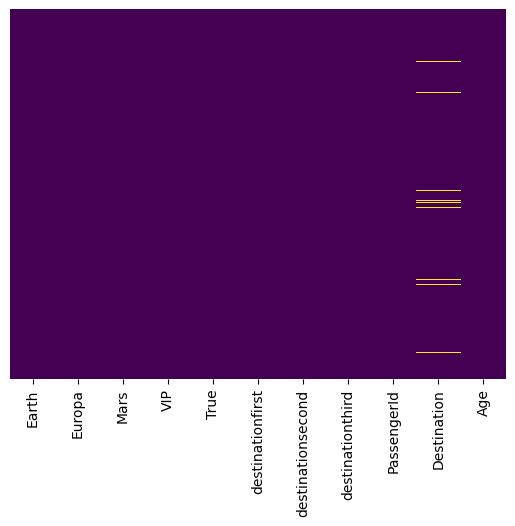

In [144]:
sns.heatmap(table.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [145]:
table.drop('Destination',axis=1,inplace=True)

In [146]:
table

,Earth,Europa,Mars,VIP,True,destinationfirst,destinationsecond,destinationthird,PassengerId,Age
0,True,False,False,True,False,False,False,True,0013_01,27.0
1,True,False,False,True,False,False,False,True,0018_01,19.0
2,False,True,False,True,False,True,False,False,0019_01,31.0
3,False,True,False,True,False,False,False,True,0021_01,38.0
4,True,False,False,True,False,False,False,True,0023_01,20.0
...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,True,False,False,False,True,9266_02,34.0
4273,True,False,False,True,False,False,False,True,9269_01,42.0
4274,False,False,True,True,False,True,False,False,9271_01,28.0
4275,False,True,False,True,False,False,False,False,9273_01,28.0


<Axes: >

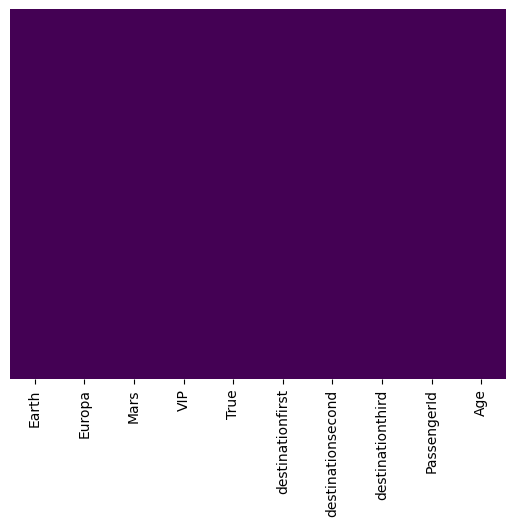

In [147]:
sns.heatmap(table.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [148]:
abc

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,VIP,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,9280_01,32.0,False


In [149]:
abc.rename(columns={'55 Cancri e': 'destinationfirst'}, inplace=True)

In [150]:
abc.rename(columns={'PSO J318.5-22':'destinationsecond'}, inplace=True)

In [151]:
abc.rename(columns={'TRAPPIST-1e':'destinationthird'}, inplace=True)

In [152]:
abc

,Earth,Europa,Mars,destinationfirst,destinationsecond,destinationthird,VIP,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,9280_01,32.0,False


In [153]:
table

,Earth,Europa,Mars,VIP,True,destinationfirst,destinationsecond,destinationthird,PassengerId,Age
0,True,False,False,True,False,False,False,True,0013_01,27.0
1,True,False,False,True,False,False,False,True,0018_01,19.0
2,False,True,False,True,False,True,False,False,0019_01,31.0
3,False,True,False,True,False,False,False,True,0021_01,38.0
4,True,False,False,True,False,False,False,True,0023_01,20.0
...,...,...,...,...,...,...,...,...,...,...
4272,True,False,False,True,False,False,False,True,9266_02,34.0
4273,True,False,False,True,False,False,False,True,9269_01,42.0
4274,False,False,True,True,False,True,False,False,9271_01,28.0
4275,False,True,False,True,False,False,False,False,9273_01,28.0


In [154]:
desired_columns = ['Earth','Europa','Mars','destinationfirst','destinationsecond','destinationthird','VIP','PassengerId','Age']

In [155]:
table=table[desired_columns]

In [156]:
table

,Earth,Europa,Mars,destinationfirst,destinationsecond,destinationthird,VIP,PassengerId,Age
0,True,False,False,False,False,True,True,0013_01,27.0
1,True,False,False,False,False,True,True,0018_01,19.0
2,False,True,False,True,False,False,True,0019_01,31.0
3,False,True,False,False,False,True,True,0021_01,38.0
4,True,False,False,False,False,True,True,0023_01,20.0
...,...,...,...,...,...,...,...,...,...
4272,True,False,False,False,False,True,True,9266_02,34.0
4273,True,False,False,False,False,True,True,9269_01,42.0
4274,False,False,True,True,False,False,True,9271_01,28.0
4275,False,True,False,False,False,False,True,9273_01,28.0


In [157]:
abc

,Earth,Europa,Mars,destinationfirst,destinationsecond,destinationthird,VIP,PassengerId,Age,Transported
0,False,True,False,False,False,True,1.0,0001_01,39.0,False
1,True,False,False,False,False,True,1.0,0002_01,24.0,True
2,False,True,False,False,False,True,0.0,0003_01,58.0,False
3,False,True,False,False,False,True,1.0,0003_02,33.0,False
4,True,False,False,False,False,True,1.0,0004_01,16.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,0.0,9276_01,41.0,False
8689,True,False,False,False,True,False,1.0,9278_01,18.0,False
8690,True,False,False,False,False,True,1.0,9279_01,26.0,True
8691,False,True,False,True,False,False,1.0,9280_01,32.0,False


In [158]:
predictions=lgr.predict(table)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- destinationfirst
- destinationsecond
- destinationthird
Feature names seen at fit time, yet now missing:
- 55 Cancri e
- PSO J318.5-22
- TRAPPIST-1e


In [ ]:
predictions=lgr.predict(''

In [ ]:
new=pd.DataFrame(predictions)

In [ ]:
finals=abc['PassengerId'].head()

In [159]:
finals

NameError: name 'finals' is not defined

In [160]:
result = pd.concat([finals, new], axis=1)

NameError: name 'finals' is not defined

In [161]:
result.head()

,destinationfirst,destinationsecond,destinationthird,PassengerId,HomePlanet,Destination,Age,VIP
0,False,False,True,0013_01,Earth,TRAPPIST-1e,27.0,False
1,False,False,True,0018_01,Earth,TRAPPIST-1e,19.0,False
2,True,False,False,0019_01,Europa,55 Cancri e,31.0,False
3,False,False,True,0021_01,Europa,TRAPPIST-1e,38.0,False
4,False,False,True,0023_01,Earth,TRAPPIST-1e,20.0,False
